In [1]:
%matplotlib inline

In [2]:
#environment setup with watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Gopala KR 
last updated: 2018-01-30 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2
nltk 3.2.5
sklearn 0.19.0
tensorflow 1.3.0
theano 1.0.1
mxnet 1.0.0
chainer 3.3.0



# The Johnson-Lindenstrauss bound for embedding with random projections



The `Johnson-Lindenstrauss lemma`_ states that any high dimensional
dataset can be randomly projected into a lower dimensional Euclidean
space while controlling the distortion in the pairwise distances.



Theoretical bounds
==================

The distortion introduced by a random projection `p` is asserted by
the fact that `p` is defining an eps-embedding with good probability
as defined by:

\begin{align}(1 - eps) \|u - v\|^2 < \|p(u) - p(v)\|^2 < (1 + eps) \|u - v\|^2\end{align}

Where u and v are any rows taken from a dataset of shape [n_samples,
n_features] and p is a projection by a random Gaussian N(0, 1) matrix
with shape [n_components, n_features] (or a sparse Achlioptas matrix).

The minimum number of components to guarantees the eps-embedding is
given by:

\begin{align}n\_components >= 4 log(n\_samples) / (eps^2 / 2 - eps^3 / 3)\end{align}


The first plot shows that with an increasing number of samples ``n_samples``,
the minimal number of dimensions ``n_components`` increased logarithmically
in order to guarantee an ``eps``-embedding.

The second plot shows that an increase of the admissible
distortion ``eps`` allows to reduce drastically the minimal number of
dimensions ``n_components`` for a given number of samples ``n_samples``


Empirical validation
====================

We validate the above bounds on the digits dataset or on the 20 newsgroups
text document (TF-IDF word frequencies) dataset:

- for the digits dataset, some 8x8 gray level pixels data for 500
  handwritten digits pictures are randomly projected to spaces for various
  larger number of dimensions ``n_components``.

- for the 20 newsgroups dataset some 500 documents with 100k
  features in total are projected using a sparse random matrix to smaller
  euclidean spaces with various values for the target number of dimensions
  ``n_components``.

The default dataset is the digits dataset. To run the example on the twenty
newsgroups dataset, pass the --twenty-newsgroups command line argument to this
script.

For each value of ``n_components``, we plot:

- 2D distribution of sample pairs with pairwise distances in original
  and projected spaces as x and y axis respectively.

- 1D histogram of the ratio of those distances (projected / original).

We can see that for low values of ``n_components`` the distribution is wide
with many distorted pairs and a skewed distribution (due to the hard
limit of zero ratio on the left as distances are always positives)
while for larger values of n_components the distortion is controlled
and the distances are well preserved by the random projection.


Remarks
=======

According to the JL lemma, projecting 500 samples without too much distortion
will require at least several thousands dimensions, irrespective of the
number of features of the original dataset.

Hence using random projections on the digits dataset which only has 64 features
in the input space does not make sense: it does not allow for dimensionality
reduction in this case.

On the twenty newsgroups on the other hand the dimensionality can be decreased
from 56436 down to 10000 while reasonably preserving pairwise distances.




Automatically created module for IPython interactive environment
Embedding 500 samples with dim 64 using various random projections
Projected 500 samples from 64 to 300 in 0.029s
Random matrix with size: 0.030MB


/srv/venv/lib/python3.6/site-packages/sklearn/random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 300).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


Mean distances rate: 1.06 (0.08)
Projected 500 samples from 64 to 1000 in 0.033s
Random matrix with size: 0.098MB


/srv/venv/lib/python3.6/site-packages/sklearn/random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 1000).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


Mean distances rate: 1.03 (0.04)


/srv/venv/lib/python3.6/site-packages/sklearn/random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 10000).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


Projected 500 samples from 64 to 10000 in 0.352s
Random matrix with size: 0.953MB
Mean distances rate: 0.99 (0.02)


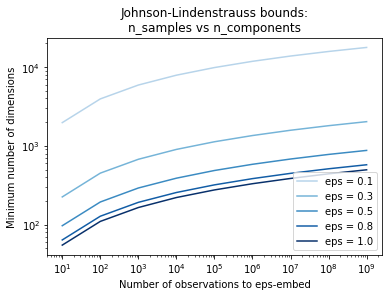

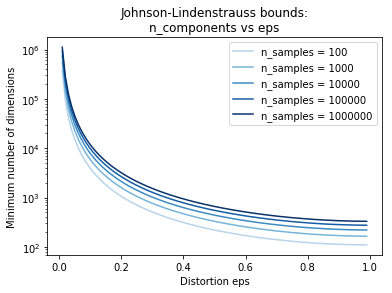

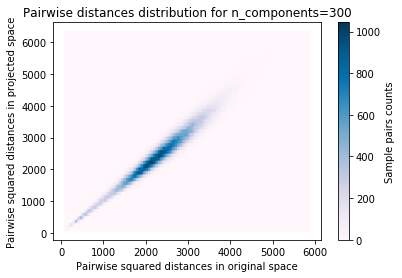

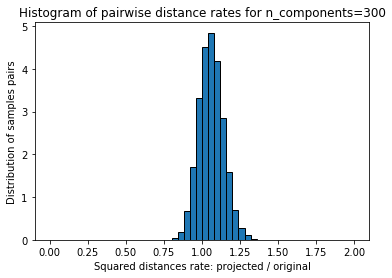

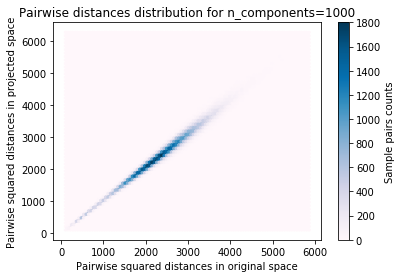

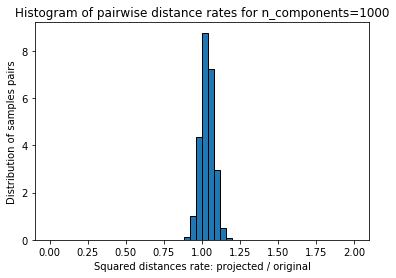

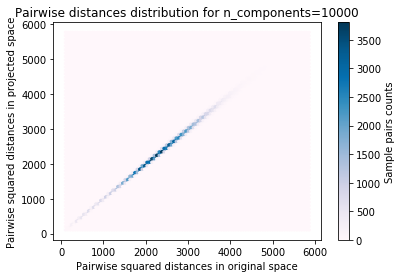

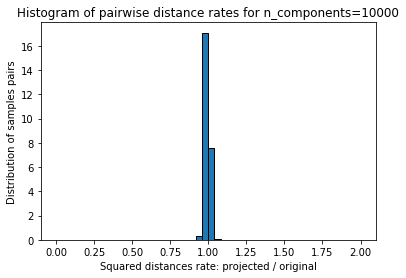

In [3]:
print(__doc__)

import sys
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import euclidean_distances

# Part 1: plot the theoretical dependency between n_components_min and
# n_samples

# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

# range of number of samples (observation) to embed
n_samples_range = np.logspace(1, 9, 9)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
    plt.loglog(n_samples_range, min_n_components, color=color)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Number of observations to eps-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")

# range of admissible distortions
eps_range = np.linspace(0.01, 0.99, 100)

# range of number of samples (observation) to embed
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(n_samples_range)))

plt.figure()
for n_samples, color in zip(n_samples_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples, eps=eps_range)
    plt.semilogy(eps_range, min_n_components, color=color)

plt.legend(["n_samples = %d" % n for n in n_samples_range], loc="upper right")
plt.xlabel("Distortion eps")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_components vs eps")

# Part 2: perform sparse random projection of some digits images which are
# quite low dimensional and dense or documents of the 20 newsgroups dataset
# which is both high dimensional and sparse

if '--twenty-newsgroups' in sys.argv:
    # Need an internet connection hence not enabled by default
    data = fetch_20newsgroups_vectorized().data[:500]
else:
    data = load_digits().data[:500]

n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.array([300, 1000, 10000])
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, normed=True, range=(0., 2.), edgecolor='k')
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

    # TODO: compute the expected value of eps and add them to the previous plot
    # as vertical lines / region

plt.show()

In [ ]:
test complete; Gopal